In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
digits = datasets.load_digits()

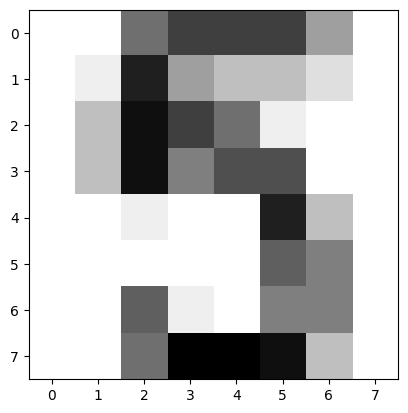

In [ ]:
plt.imshow(digits.images[1010], cmap = plt.cm.gray_r, interpolation='nearest')

In [ ]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42, stratify = y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print("Accuracy: {0}". format(knn.score(X_test, y_test)))

Accuracy: 0.9861111111111112


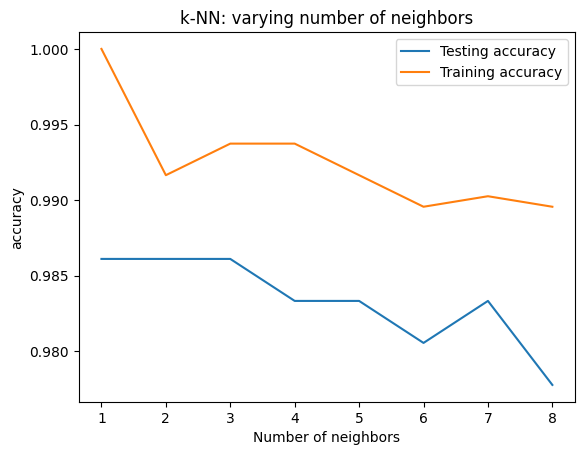

In [ ]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: varying number of neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('accuracy')
plt.show()

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn 
import torch.nn.functional as F
from torch.autograd import Variable

In [ ]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train=True, download =True)

100%|██████████| 9912422/9912422 [00:00<00:00, 80603544.45it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 61867055.07it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26040414.47it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9597243.71it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
print("Number of training examples", mnist.train_data.shape)
print("Image information", mnist[0])

Number of training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x7F051E53C220>, 5)


/usr/local/lib/python3.9/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


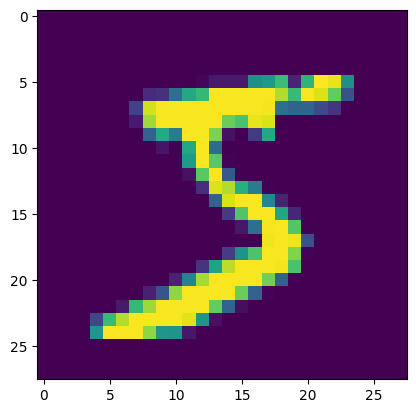

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fully = nn.Sequential(
            nn.Linear(28*28, 10)
        )
    def forward(self, x):
      x = x.view([-1,28*28])
      x = self.fully(x)
      x = F.log_softmax(x, dim = 1)
      return x

In [ ]:
from scipy.spatial import transform
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train = True, transform = transforms.Compose([transform
                                                        s.ToTensor()])),batch_size = 64, shuff)

SyntaxError: ignored

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving gapminder.csv to gapminder.csv


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('grapminder.csv')
ax = sns.heatmap(df.corr(), square = True, cmap = 'RdYlGn')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
x_fertility = df['fertility'].value.reshape(-1,1)
y_life = df['life'].value.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility),max(x_fertility)).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size=0.3, random_state=42)

In [ ]:
reg = LinearRegression()

reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)
print(reg.score(x_fertility, y_life))

In [ ]:
plt.scatter(x_fertility, y_life, color = 'blue')
plt.plot(prediction_space, y_predict, color='black', linewidth = 3)
plt.ylabel('Life expectacy')
plt.xlabel('fertilitty')
plt.show()

In [ ]:
features = pd.read_csv(gapmider.csv)
df = pd.read_csv(gapminder.csv)
del features['life']
del features['Region']
y_lide = df['life'].value.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_slipt(features, y_life,test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fix(x_train, y_life)
print(reg_all.score(features,y_life))